In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('S:\ML\Datasets\Classification\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Checking Data Information

In [25]:
df.shape

(284807, 31)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### Checking Missing Values

In [28]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values found.

In [29]:
df.duplicated().sum()

1081

There are 1081 duplicate values.

In [30]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

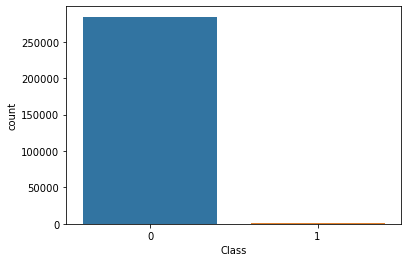

In [31]:
sns.countplot(x=df["Class"],data=df)

###### Data is imbalance.we need to balance the dataset.

In [32]:
pip install imblearn

###  Independent Varialbe(x) & Dependent Variable(y)

In [33]:
x=df.drop(columns=['Class','Time'])
y=df['Class']

In [34]:
x.shape,y.shape

((284807, 29), (284807,))

### Undersampling for data balancing

In [35]:
from imblearn.under_sampling import NearMiss
## Implementing Undersampling for handling Imbalance
nm=NearMiss()
x1,y1=nm.fit_resample(x,y)
x1.shape,y1.shape

((984, 29), (984,))

In [36]:
y1.value_counts()

1    492
0    492
Name: Class, dtype: int64

### Oversampling for data balancing

In [37]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=2)
x2,y2=os.fit_resample(x,y)
x2.shape,y2.shape

((568630, 29), (568630,))

In [38]:
y2.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

### Splitting Oversampled Data

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [40]:
## Checking shape of train data
xtrain.shape,ytrain.shape

((454904, 29), (454904,))

In [41]:
## Checking shape of test data
xtest.shape,ytest.shape

((113726, 29), (113726,))

##  Bagging Meta estimator Classifier

In [42]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier

#Making the baggingclassifier with 40 Decision Trees(Decision tree is default estimator)
model=BaggingClassifier(n_estimators=40)

#Model Fitting/Training
model.fit(xtrain,ytrain)

# Model Testing
ypred=model.predict(xtest)


Accuracy: 0.9998593109755025
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



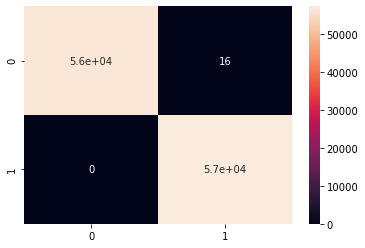

In [43]:
## Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

## Random Forest Classifier

In [44]:
## Spliting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [45]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)

## Model fitting/Training
model.fit(xtrain,ytrain)

## Model testing
ypred=model.predict(xtest)

Accuracy: 0.9999648277438756
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



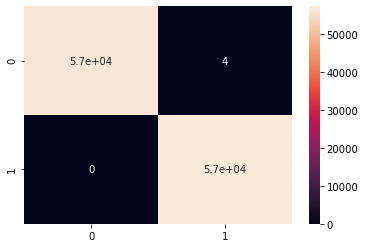

In [46]:
## Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Tuning parameters for random forest classifier

In [47]:
#model
model=RandomForestClassifier()
#parameters
n_estimators=[10,40]
criterion=['gini','entropy']
max_features=['auto','squrt','log2']
#grid
grid=dict(n_estimators=n_estimators,criterion=criterion,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_repeats=5,n_splits=3,random_state=1)
#GirdSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters:",res.best_params_)
print("best accuracy:",res.best_score_)

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "F:\Installed\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "F:\Instal

best parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}
best accuracy: 0.9999490002392505


### Retraining Random Forest Classifier model

In [48]:
## Model Retraining
model=RandomForestClassifier(criterion= 'entropy', max_features= 'log2', n_estimators= 10)
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=10)

In [49]:
## Model retesting
ypred=model.predict(xtest)

Accuracy: 0.9999648277438756
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



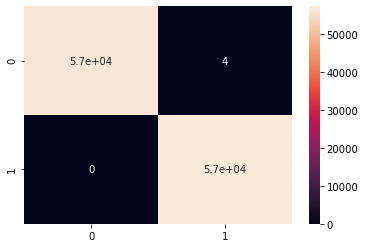

In [50]:
## Model Re-evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Bagging Meta Estimator Classifier
Accuracy: 0.9998593109755025
              
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

### Random Forest Classifier without tuning
Accuracy: 0.9999648277438756
              
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

### Random Forest Classifier with tuning
Accuracy: 0.9999648277438756
              
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220


##### As we see in the above result there was not so much difference in the accuracy of the model.There was a minute change in the decimal points of accuracy.All 3 models are nearly good for the dataset.